# Project: Movies Money!

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### TMDb Movie Data
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue

I will be looking at the movies that makes more money, to figure put the highest grossing actor, director and production company.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties (Top 5 rows)

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Reviewing  Data

In [3]:
df.shape

(10866, 21)

Data has more than 10k movies and 21 attributes, lets see which is benefitial to money

In [4]:
print(df.columns);

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')


We can see that there are many columns that are movies specific that we won't be needing in our analysis  
Like the id, imdb_id, tagline, overview, original_title, homepage, keywords, runtime  
Some might rgue that some of those affect the revenue  
Keywords persay, yet the genre is suficient to explore the keywords effect  
Runtime was dropped because rarely that one asks about that before going to attend a movie  
I am going to keep title just for clarity as I analyze tho

We are going to drop the columns mentioned

In [5]:
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'runtime', 'release_date'],axis= 1, inplace= True);

peaking at the data again

In [6]:
df.head()

,popularity,budget,revenue,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


Note that the last two columns of budget and revenue are more fair to comparing all the movies according to money which is our concern
so we can drop the revenue and budget columns and keep the more relevant ones

In [7]:
cols = ['budget', 'revenue']
df.drop(cols, axis= 1, inplace= True);

We can rename the two last columns to be simply budget and revnue

In [8]:
df.rename(columns= lambda x: x.replace("_adj", ""), inplace= True)
df.head()

,popularity,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget,revenue
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity              10866 non-null float64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
genres                  10843 non-null object
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget                  10866 non-null float64
revenue                 10866 non-null float64
dtypes: float64(4), int64(2), object(5)
memory usage: 933.9+ KB


In [10]:
df.describe()

,popularity,vote_count,vote_average,release_year,budget,revenue
count,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning 

There are some movies with na values, given that the database is large, we can just drop them

In [11]:
df.dropna(inplace= True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 11 columns):
popularity              9773 non-null float64
original_title          9773 non-null object
cast                    9773 non-null object
director                9773 non-null object
genres                  9773 non-null object
production_companies    9773 non-null object
vote_count              9773 non-null int64
vote_average            9773 non-null float64
release_year            9773 non-null int64
budget                  9773 non-null float64
revenue                 9773 non-null float64
dtypes: float64(4), int64(2), object(5)
memory usage: 916.2+ KB


There are some Movies that didn't get any revenue and others having zero budget  
Which is irrational, let's see how we can fix this 

In [13]:
non_zero_budget = df.budget != 0
non_zero_revenue = df.revenue != 0
df_new = df[non_zero_budget & non_zero_revenue] 
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3806 entries, 0 to 10848
Data columns (total 11 columns):
popularity              3806 non-null float64
original_title          3806 non-null object
cast                    3806 non-null object
director                3806 non-null object
genres                  3806 non-null object
production_companies    3806 non-null object
vote_count              3806 non-null int64
vote_average            3806 non-null float64
release_year            3806 non-null int64
budget                  3806 non-null float64
revenue                 3806 non-null float64
dtypes: float64(4), int64(2), object(5)
memory usage: 356.8+ KB


Although the size of data has decreased to below half  
yet this is te data that concerns us, as it has full data on its finance 

In [14]:
df = df_new
df.describe()

,popularity,vote_count,vote_average,release_year,budget,revenue
count,3806.000000,3806.000000,3806.000000,3806.000000,3.806000e+03,3.806000e+03
mean,1.203625,534.047556,6.170257,2001.231477,4.471590e+07,1.386797e+08
std,1.480407,883.668197,0.792560,11.329019,4.488171e+07,2.169803e+08
min,0.010335,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.470673,74.000000,5.700000,1995.000000,1.354637e+07,1.923514e+07
50%,0.810226,208.500000,6.200000,2004.000000,3.038360e+07,6.283467e+07
75%,1.387058,584.000000,6.700000,2010.000000,6.083489e+07,1.657273e+08
max,32.985763,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [15]:
df_og = df.copy()
df_test = df.copy()

In [16]:
for col in df:
    if(df[col].dtypes == 'object'):
        print(col, df[col].str.contains('|').any())

original_title True
cast True
director True
genres True
production_companies True


In [17]:
# These are the columns that have multiple values that we care about bing separated 
cols = ['cast', 'director', 'genres', 'production_companies']
for col in cols:
    print(df[col].str.split('|').head())  #.stack()) #
    break

0    [Chris Pratt, Bryce Dallas Howard, Irrfan Khan...
1    [Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...
2    [Shailene Woodley, Theo James, Kate Winslet, A...
3    [Harrison Ford, Mark Hamill, Carrie Fisher, Ad...
4    [Vin Diesel, Paul Walker, Jason Statham, Miche...
Name: cast, dtype: object


We can see here that the number of cast memebers vary and that we should have a seprate row for each one in the list
That is also the case for the other columns
I have found a function explode that handles this case when the entries of a df column are lists
therefore I will turn the column values to lists instead of a string sperated by '|', then apply the function

explode source: https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows

I took the idea only from this question on stack overflow and implemented it in another way

In [18]:
def explode(df, col):
    print(col);
    l = [];
    err_cnt = 0;
    for idx, row in df.iterrows():
        new_row = row.copy();
        
        try:
            range(len(row[col]))
        except:
            print(row[col])
            err_cnt+=1;
            continue
        
        for i in range(len(row[col])):
            new_row1 = new_row.copy()
            new_row1[col] = row[col][i];
            l.append(new_row1);
    print(err_cnt)
    return pd.DataFrame(l)

In [19]:
# first turn the columns values to lists
cols = ['cast', 'director', 'genres', 'production_companies']
for col in cols:
    df_test[col] = df_test[col].str.split('|') 
    
print(df_test.head())

   popularity                original_title  \
0   32.985763                Jurassic World   
1   28.419936            Mad Max: Fury Road   
2   13.112507                     Insurgent   
3   11.173104  Star Wars: The Force Awakens   
4    9.335014                     Furious 7   

                                                cast            director  \
0  [Chris Pratt, Bryce Dallas Howard, Irrfan Khan...   [Colin Trevorrow]   
1  [Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...     [George Miller]   
2  [Shailene Woodley, Theo James, Kate Winslet, A...  [Robert Schwentke]   
3  [Harrison Ford, Mark Hamill, Carrie Fisher, Ad...       [J.J. Abrams]   
4  [Vin Diesel, Paul Walker, Jason Statham, Miche...         [James Wan]   

                                           genres  \
0  [Action, Adventure, Science Fiction, Thriller]   
1  [Action, Adventure, Science Fiction, Thriller]   
2          [Adventure, Science Fiction, Thriller]   
3   [Action, Adventure, Science Fiction, Fantasy

In [20]:
df_test2 = df_test.copy()

In [21]:
df_test2.head()

,popularity,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget,revenue
0,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",[George Miller],"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",[Robert Schwentke],"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",[J.J. Abrams],"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",[James Wan],"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2947,7.3,2015,1.747999e+08,1.385749e+09


In [22]:
df_test.head()

,popularity,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget,revenue
0,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",[George Miller],"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",[Robert Schwentke],"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",[J.J. Abrams],"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",[James Wan],"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2947,7.3,2015,1.747999e+08,1.385749e+09


In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3806 entries, 0 to 10848
Data columns (total 11 columns):
popularity              3806 non-null float64
original_title          3806 non-null object
cast                    3806 non-null object
director                3806 non-null object
genres                  3806 non-null object
production_companies    3806 non-null object
vote_count              3806 non-null int64
vote_average            3806 non-null float64
release_year            3806 non-null int64
budget                  3806 non-null float64
revenue                 3806 non-null float64
dtypes: float64(4), int64(2), object(5)
memory usage: 356.8+ KB


In [24]:
cols = ['cast', 'director', 'genres', 'production_companies']

df_test = explode(df_test2, cols[3])

production_companies
0


In [25]:
df_test[df_test.original_title == 'Jurassic World']

,popularity,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget,revenue
0,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],"[Action, Adventure, Science Fiction, Thriller]",Universal Studios,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],"[Action, Adventure, Science Fiction, Thriller]",Amblin Entertainment,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],"[Action, Adventure, Science Fiction, Thriller]",Legendary Pictures,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],"[Action, Adventure, Science Fiction, Thriller]",Fuji Television Network,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],"[Action, Adventure, Science Fiction, Thriller]",Dentsu,5562,6.5,2015,1.379999e+08,1.392446e+09


In [26]:
df_test.describe()

,popularity,vote_count,vote_average,release_year,budget,revenue
count,10583.000000,10583.000000,10583.000000,10583.000000,1.058300e+04,1.058300e+04
mean,1.315150,605.610791,6.170065,2003.302655,4.790437e+07,1.403154e+08
std,1.617526,918.518307,0.785524,10.124726,4.639072e+07,2.121271e+08
min,0.010335,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.526992,96.000000,5.700000,1999.000000,1.471112e+07,2.044683e+07
50%,0.901780,264.000000,6.200000,2006.000000,3.276117e+07,6.648215e+07
75%,1.517201,702.000000,6.700000,2011.000000,6.688477e+07,1.729863e+08
max,32.985763,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [27]:
df_test.production_companies.value_counts().median()

1.0

In [28]:
df_test.groupby('production_companies').mean()

,popularity,vote_count,vote_average,release_year,budget,revenue
production_companies,,,,,,
"""DIA"" Productions GmbH & Co. KG",1.626534,152.000000,5.700000,2003.000000,4.267270e+07,5.257149e+07
1019 Entertainment,0.336107,55.000000,5.700000,2015.000000,1.839999e+06,2.577386e+06
10th Hole Productions,0.434259,141.333333,6.233333,2011.000000,4.705400e+06,1.194264e+07
11:11 Mediaworks,0.727752,154.000000,5.200000,2006.000000,2.704173e+07,1.289223e+08
120dB Films,0.375513,76.500000,6.400000,2012.000000,2.808101e+06,4.997941e+05
1492 Pictures,2.798542,1508.666667,6.213333,2005.533333,1.077904e+08,4.045908e+08
1818,0.290596,27.000000,5.200000,1983.000000,1.094656e+07,2.678104e+07
1821 Pictures,0.259794,81.000000,5.600000,2015.000000,5.519998e+05,6.520453e+06
1984 Private Defense Contractors,1.337985,572.400000,6.060000,2012.200000,2.915429e+07,3.616286e+07


In [29]:
cols = ['cast', 'director', 'genres', 'production_companies']

df_test = explode(df_test2, cols[2])

genres
0


In [30]:
df_test[df_test.original_title == 'Jurassic World']

,popularity,original_title,cast,director,genres,production_companies,vote_count,vote_average,release_year,budget,revenue
0,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],Action,"[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],Adventure,"[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],Science Fiction,"[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],Thriller,"[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,1.379999e+08,1.392446e+09


In [31]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10185 entries, 0 to 10848
Data columns (total 11 columns):
popularity              10185 non-null float64
original_title          10185 non-null object
cast                    10185 non-null object
director                10185 non-null object
genres                  10185 non-null object
production_companies    10185 non-null object
vote_count              10185 non-null int64
vote_average            10185 non-null float64
release_year            10185 non-null int64
budget                  10185 non-null float64
revenue                 10185 non-null float64
dtypes: float64(4), int64(2), object(5)
memory usage: 954.8+ KB


In [32]:
df_test.genres.value_counts()

Drama              1730
Comedy             1335
Thriller           1195
Action             1077
Adventure           743
Romance             658
Crime               650
Science Fiction     518
Horror              459
Family              417
Fantasy             395
Mystery             343
Animation           199
Music               131
History             128
War                 119
Western              52
Documentary          26
Foreign               9
TV Movie              1
Name: genres, dtype: int64

It is clear that the explode function really explodes, data multiplies wildly when it is applied to one column, so our analysis would conduct each column alone after being exploded to figure out the highest money making movies

<a id='eda'></a>
## Exploratory Data Analysis
we will "explode" some columns to see which unique member of them makes more money

Store the dataframe that contains lists to be the default df

In [33]:
df = df_test2.copy()

### Which company participated in movies that made total most money?

In [34]:
col = 'production_companies'
prod_comp_df = explode(df, col)
prod_comp_df.rename(columns= lambda x: x.replace(col, col[:-3] + 'y'), inplace= True);
prod_comp_df.head(1)

production_companies
0


,popularity,original_title,cast,director,genres,production_company,vote_count,vote_average,release_year,budget,revenue
0,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],"[Action, Adventure, Science Fiction, Thriller]",Universal Studios,5562,6.5,2015,1.379999e+08,1.392446e+09


In [35]:
prod_comp_df.groupby('production_company')

In [36]:
no_films_per_comp = prod_comp_df.groupby('production_company')['revenue'].count()
no_films_per_comp.nlargest(10)

production_company
Universal Pictures                        329
Warner Bros.                              324
Paramount Pictures                        270
Twentieth Century Fox Film Corporation    201
Columbia Pictures                         178
New Line Cinema                           152
Walt Disney Pictures                      117
Touchstone Pictures                       116
Metro-Goldwyn-Mayer (MGM)                 109
Relativity Media                          102
Name: revenue, dtype: int64

In [37]:
top_earning_comp = prod_comp_df.groupby('production_company')['revenue'].sum().nlargest(10)

In [38]:
print(top_earning_comp)

production_company
Warner Bros.                              6.696881e+10
Universal Pictures                        6.048796e+10
Paramount Pictures                        5.413069e+10
Twentieth Century Fox Film Corporation    5.037067e+10
Walt Disney Pictures                      3.667857e+10
Columbia Pictures                         3.194263e+10
New Line Cinema                           2.262007e+10
Amblin Entertainment                      2.057594e+10
Metro-Goldwyn-Mayer (MGM)                 1.892283e+10
Columbia Pictures Corporation             1.714948e+10
Name: revenue, dtype: float64


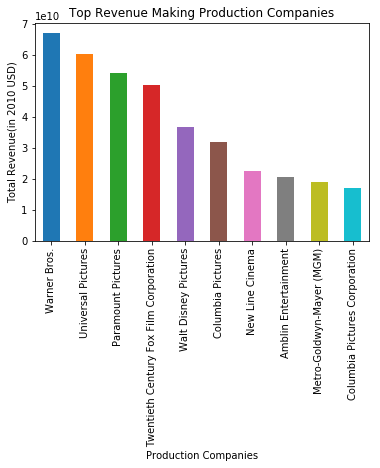

In [43]:
top_earning_comp.plot.bar();
plt.title('Top Revenue Making Production Companies')
plt.xlabel('Production Companies')
plt.ylabel('Total Revenue(in 2010 USD)');

We can see clearly that Warner Bros and Universal Studios are leading the charts  
Followed by Paramount Pictures and 20th Cetury Fox  
Yet these companies make a lot of movies, they accumulate a lot doing so
So we can see the top earning companies, yet on avergae which are the top earning ones?

In [44]:
top_earning_comp_avg = prod_comp_df.groupby('production_company')['revenue'].mean().nlargest(10)
top_earning_comp_avg

production_company
Hoya Productions                                   2.167325e+09
Truenorth Productions                              1.902723e+09
Alfran Productions                                 1.277914e+09
Argyle Enterprises                                 1.129535e+09
EMI Films                                          1.092965e+09
Julia Phillips and Michael Phillips Productions    1.092965e+09
Second Mate Productions                            1.081672e+09
MIRACLE Productions GmbH & Co. KG                  1.062776e+09
Disney Enterprises                                 1.024887e+09
Patalex IV Productions Limited                     1.000353e+09
Name: revenue, dtype: float64

it is weird enough we can not recognize anyone of those, luckily we can see how many movies contributies that they have to the dataset

In [45]:
no_films_per_comp[top_earning_comp_avg.index]

production_company
Hoya Productions                                   1
Truenorth Productions                              1
Alfran Productions                                 1
Argyle Enterprises                                 1
EMI Films                                          1
Julia Phillips and Michael Phillips Productions    1
Second Mate Productions                            2
MIRACLE Productions GmbH & Co. KG                  1
Disney Enterprises                                 1
Patalex IV Productions Limited                     1
Name: revenue, dtype: int64

since these companies don't make enough contributions, then this measure isn't benefitial when taking the most averaged

In [46]:
earning_comp_avg = prod_comp_df.groupby('production_company')['revenue'].mean()
earning_comp_avg[top_earning_comp.index].sort_values(ascending= False)

production_company
Amblin Entertainment                      4.115187e+08
Walt Disney Pictures                      3.134920e+08
Twentieth Century Fox Film Corporation    2.506003e+08
Warner Bros.                              2.066938e+08
Paramount Pictures                        2.004840e+08
Universal Pictures                        1.838540e+08
Columbia Pictures                         1.794530e+08
Metro-Goldwyn-Mayer (MGM)                 1.736040e+08
Columbia Pictures Corporation             1.697968e+08
New Line Cinema                           1.488162e+08
Name: revenue, dtype: float64

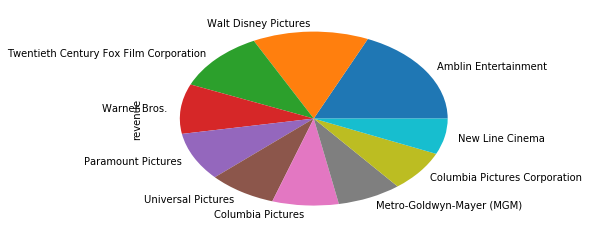

In [47]:
avg_top_earning_comp = earning_comp_avg[top_earning_comp.index].sort_values(ascending= False)
avg_top_earning_comp.plot.pie();
plt.title('Top Revenue Making Production Companies per film')

We can see from here that although Warner Bros Movies have the most total revnue  
An Amblin Entertainmnet or a Walt Disney Pictures movies is expected to earn more  
It is also worth mentioning that 20th century fox with all many productions keeps a high average, which makes them a solid consistent competitor 

### Who are the actors who made most total revenue? 

In [48]:
col = 'cast'
actors_df = explode(df, col)
actors_df.rename(columns= lambda x: x.replace(col, 'actor'), inplace= True);
actors_df.head(1)

cast
0


,popularity,original_title,actor,director,genres,production_companies,vote_count,vote_average,release_year,budget,revenue
0,32.985763,Jurassic World,Chris Pratt,[Colin Trevorrow],"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,1.379999e+08,1.392446e+09


In [49]:
actors_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18984 entries, 0 to 10848
Data columns (total 11 columns):
popularity              18984 non-null float64
original_title          18984 non-null object
actor                   18984 non-null object
director                18984 non-null object
genres                  18984 non-null object
production_companies    18984 non-null object
vote_count              18984 non-null int64
vote_average            18984 non-null float64
release_year            18984 non-null int64
budget                  18984 non-null float64
revenue                 18984 non-null float64
dtypes: float64(4), int64(2), object(5)
memory usage: 1.7+ MB


In [50]:
no_movies_by_actor = actors_df.groupby('actor')['revenue'].count()
no_movies_by_actor.nlargest(10)

actor
Robert De Niro        52
Bruce Willis          46
Samuel L. Jackson     44
Nicolas Cage          43
Matt Damon            36
Johnny Depp           35
Brad Pitt             34
Harrison Ford         34
Morgan Freeman        34
Sylvester Stallone    34
Name: revenue, dtype: int64

In [51]:
top_earning_actors = actors_df.groupby('actor')['revenue'].sum().nlargest(10)
top_earning_actors

actor
Harrison Ford       1.428570e+10
Tom Cruise          1.117507e+10
Tom Hanks           1.043351e+10
Emma Watson         8.790080e+09
Ian McKellen        8.628837e+09
Johnny Depp         8.518033e+09
Daniel Radcliffe    8.515082e+09
Eddie Murphy        8.403307e+09
Rupert Grint        8.358341e+09
Bruce Willis        8.236476e+09
Name: revenue, dtype: float64

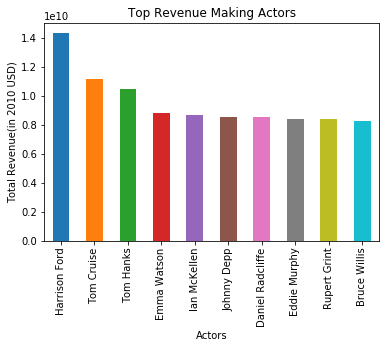

In [53]:
top_earning_actors.plot.bar()
plt.title('Top Revenue Making Actors')
plt.xlabel('Actors')
plt.ylabel('Total Revenue(in 2010 USD)');

Harrison Ford's movies made the bucks!!  
As we can see he has a significant lead over Tom Cruise and Tom Hanks who came in 2nd and 3rd  
The rest have relatively equal revenie to their names

In [54]:
top_earning_actors_avg = actors_df.groupby('actor')['revenue'].mean().nlargest(10)
top_earning_actors_avg

actor
Jason Miller          2.167325e+09
Daisy Ridley          1.902723e+09
Robert MacNaughton    1.791694e+09
Ken Howard            1.583050e+09
Wendy Gazelle         1.583050e+09
Ben Wright            1.574815e+09
Betty Lou Gerson      1.574815e+09
J. Pat O'Malley       1.574815e+09
Martha Wentworth      1.574815e+09
Mark Hamill           1.475872e+09
Name: revenue, dtype: float64

In [55]:
no_movies_by_actor[top_earning_actors_avg.index]

actor
Jason Miller          1
Daisy Ridley          1
Robert MacNaughton    1
Ken Howard            1
Wendy Gazelle         1
Ben Wright            1
Betty Lou Gerson      1
J. Pat O'Malley       1
Martha Wentworth      1
Mark Hamill           5
Name: revenue, dtype: int64

again, the averages itself are not useful as these are one time things  
we can widen up the search for the expected top earning actor this time going for the top 50 total earners, then checking on the mean of all of them 

In [56]:
top_earning_actors = actors_df.groupby('actor')['revenue'].sum().nlargest(50)
top_earning_actors

actor
Harrison Ford            1.428570e+10
Tom Cruise               1.117507e+10
Tom Hanks                1.043351e+10
Emma Watson              8.790080e+09
Ian McKellen             8.628837e+09
Johnny Depp              8.518033e+09
Daniel Radcliffe         8.515082e+09
Eddie Murphy             8.403307e+09
Rupert Grint             8.358341e+09
Bruce Willis             8.236476e+09
Samuel L. Jackson        7.948471e+09
Cameron Diaz             7.836254e+09
Will Smith               7.775643e+09
Carrie Fisher            7.678282e+09
Ralph Fiennes            7.591763e+09
Brad Pitt                7.546207e+09
Orlando Bloom            7.467078e+09
Sean Connery             7.407260e+09
Mark Hamill              7.379360e+09
Leonardo DiCaprio        7.226350e+09
Gary Oldman              7.116634e+09
Robert Downey Jr.        7.051118e+09
Robin Williams           6.963477e+09
Sandra Bullock           6.913063e+09
Sylvester Stallone       6.807269e+09
Ben Stiller              6.694215e+09
Arnold

In [57]:
earning_actors_avg = actors_df.groupby('actor')['revenue'].mean()
earning_actors_avg[top_earning_actors.index].nlargest(10)

actor
Mark Hamill           1.475872e+09
Carrie Fisher         1.096897e+09
Rupert Grint          9.287045e+08
Emma Watson           7.325067e+08
Daniel Radcliffe      7.095902e+08
Orlando Bloom         6.788253e+08
Ian McKellen          6.163455e+08
Julie Andrews         5.560047e+08
Michelle Rodriguez    4.533053e+08
Harrison Ford         4.201675e+08
Name: revenue, dtype: float64

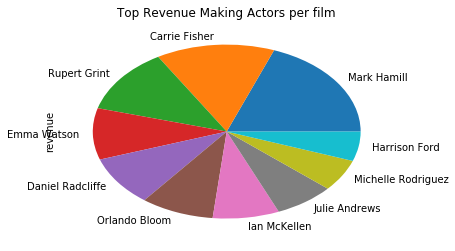

In [60]:
expected_top_earner = earning_actors_avg[top_earning_actors.index].nlargest(10)
expected_top_earner.plot.pie()
plt.title('Top Revenue Making Actors per film');

We can see that Harrison Ford has the most total revenue  
Yet it is expected that Mark Hamill is more likely to get you revenue if you hire him in your film  
We can see that Emma Watson still made this list as she had many succesful movies
Harrison Ford barely made this list inspite of leading that of total revenue, He is a drawer for sure yet some movies he made didn't make much money so he took a few steps back on average

### Which are the genres who made most total revenue? 

In [61]:
col = 'genres'
genres_df = explode(df, col)
genres_df.rename(columns= lambda x: x.replace(col, col[:-1]), inplace= True);
genres_df.head(1)

genres
0


,popularity,original_title,cast,director,genre,production_companies,vote_count,vote_average,release_year,budget,revenue
0,32.985763,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],Action,"[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015,1.379999e+08,1.392446e+09


In [62]:
genres_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10185 entries, 0 to 10848
Data columns (total 11 columns):
popularity              10185 non-null float64
original_title          10185 non-null object
cast                    10185 non-null object
director                10185 non-null object
genre                   10185 non-null object
production_companies    10185 non-null object
vote_count              10185 non-null int64
vote_average            10185 non-null float64
release_year            10185 non-null int64
budget                  10185 non-null float64
revenue                 10185 non-null float64
dtypes: float64(4), int64(2), object(5)
memory usage: 954.8+ KB


In [63]:
genres_df.groupby('genre')['revenue'].count().nlargest(10)

genre
Drama              1730
Comedy             1335
Thriller           1195
Action             1077
Adventure           743
Romance             658
Crime               650
Science Fiction     518
Horror              459
Family              417
Name: revenue, dtype: int64

In [64]:
top_drawing_genres = genres_df.groupby('genre')['revenue'].sum().nlargest(10)
top_drawing_genres

genre
Action             2.118916e+11
Adventure          2.032181e+11
Drama              1.778131e+11
Comedy             1.645475e+11
Thriller           1.542216e+11
Science Fiction    1.049182e+11
Family             1.034647e+11
Fantasy            9.899071e+10
Romance            7.566039e+10
Crime              7.185819e+10
Name: revenue, dtype: float64

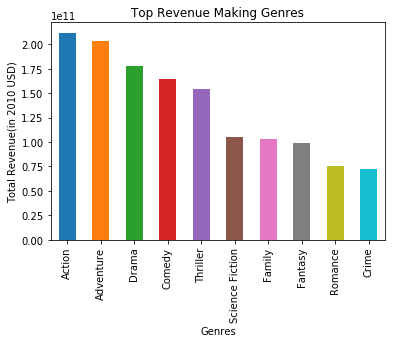

In [66]:
top_drawing_genres.plot.bar()
plt.title('Top Revenue Making Genres')
plt.xlabel('Genres')
plt.ylabel('Total Revenue(in 2010 USD)');

This plot shows that action and adventure movies dominate the movies revenue  
They are far behind other genres in terms of number of movies, yet they have managed to get the most revenue 

<a id='conclusions'></a>
## Conclusions
We were provided by a dataset of movie, after cleaning we have movies ranging from 1960 to 2015  
Now with the data we have, to maximize the revenue there a combination that stands out  
If you want to make most revenue make an action movie starring Mark Hummil produced by Amblin Entertainmnet   
Yet there are limitiations to this:  
1) As in this dataset we have no information about the actors current status of retirement or maybe dead,  Same goes to companies some may have been bought or rebradned or went out of business  
2) As companies share the production, we can't know for sure how much each company spent or which gained more in net value, so the shared revenue can be taken acclaim by every single company as they share the success, that is an acceptable measure of success for each company in the point of view of the audience, yet for companies we should get the money spent and their share of revenue to make the analysis more accurate

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])